In [9]:
import cv2
import json
import numpy as np
import json
import math
import matplotlib.pyplot as plt

In [35]:
def clamp(val,minimum,maximum):
    return max(min(val, maximum), minimum)

def findSubImageLocations(image,subImages,confidence):
    allLocations = [ np.array([]) , np.array([])];
    subImage2Loc = {}
    for subImageN in subImages:
        subImage = cv2.imread(subImageN)
        subImage = cv2.cvtColor(subImage, cv2.COLOR_BGR2GRAY)
        result = cv2.matchTemplate(image,subImage,cv2.TM_CCOEFF_NORMED)
        
        match_indices = np.arange(result.size)[(result>confidence).flatten()]
        locations =  np.unravel_index(match_indices,result.shape)
        subImage2Loc[subImageN] = locations
        allLocations[0] = np.concatenate((allLocations[0],locations[0]+(subImage.shape[0]-16)))
        allLocations[1] = np.concatenate((allLocations[1],locations[1]))
    return allLocations,subImage2Loc

def tileToString(t):
    tToStr = ['empty','solid','breakable','pickup','goodBlock','enemy','pipe','coin','bullet']
    return tToStr[int(t)]

def parseLevel(levelname):
    level = cv2.imread(levelname,0) 
    # plt.imshow(level);
    # plt.show()
    tilemap = {}
    
    prefix =  'SMBRNN-master/LevelParsing/Tiles/SMBTiles/tileset_tile'
    postfix = '.png'
    tile = 'X'
    count = {}
    for t in ['LLground','LLground2','LLground3','LLground4','LLground5',
                    'LLground6','LLground7','LLground8','LLground9',
                    'LLground10','LL1','LL2','LL3',                    
                    '00','10','33','66','99','269','270','271','434','435','436','437','438','439','450','girder','CR','C','CL']:
        tilemap['{}{}{}'.format(prefix,t,postfix)] = tile
        
        if tile not in count:
            count[tile] = 0
        count[tile] += 1

    
    prefix =  'SMBRNN-master/LevelParsing/Tiles/SMBTiles/tileset_tile'
    postfix = '.png'
    tile = '?'
    for t in ['Mushroom','MushroomLL','MushroomLL2','MushroomLL3','MushroomLL4',
                    'MushroomLL5','MushroomLL6','MushroomLL7','MushroomLL8','MushroomHidden']:
        tilemap['{}{}{}'.format(prefix,t,postfix)] = tile
        if tile not in count:
            count[tile] = 0
        count[tile] += 1

    
    prefix =  'SMBRNN-master/LevelParsing/Tiles/SMBTiles/tileset_tile'
    postfix = '.png'
    tile = 'S'
    for t in ['LLbreak','LLbreak2','01','03','67','68','69']:
        tilemap['{}{}{}'.format(prefix,t,postfix)] = tile
        if tile not in count:
            count[tile] = 0
        count[tile] += 1

    
    prefix =  'SMBRNN-master/LevelParsing/Tiles/SMBTiles/tileset_tile'
    postfix = '.png'
    tile = 'Q'
    for t in ['24','90']:
        tilemap['{}{}{}'.format(prefix,t,postfix)] = tile
        if tile not in count:
            count[tile] = 0
        count[tile] += 1

        
    prefix =  'SMBRNN-master/LevelParsing/Tiles/SMBTiles/'
    postfix = '.png'
    tile = 'E'
    for t in ['hammerbro','turtle1','turtle2','fly1','fly2','fly3','fly4','turtle1D','turtle2D','fly1D','fly2D','fly3D','fly4D','pirannha','turtle1b','turtle2b','fly1b','fly2b','fly3b','fly4b','pirannha2','turtle1bD','turtle2bD','fly1bD','fly2bD','fly3bD','fly4bD','pirannha2D','goomba','goomba2','goomba2D','PPR','PPRud']:
        tilemap['{}{}{}'.format(prefix,t,postfix)] = tile
        if tile not in count:
            count[tile] = 0
        count[tile] += 1

   

    prefix =  'SMBRNN-master/LevelParsing/Tiles/SMBTiles/tileset_tile'
    postfix = '.png'
    tile = 'B'
    for t in ['09','75']:
        tilemap['{}{}{}'.format(prefix,t,postfix)] = tile
        if tile not in count:
            count[tile] = 0
        count[tile] += 1


    prefix =  'SMBRNN-master/LevelParsing/Tiles/SMBTiles/tileset_tile'
    postfix = '.png'
    tile = 'b'
    for t in ['108','42']:
        tilemap['{}{}{}'.format(prefix,t,postfix)] = tile
        if tile not in count:
            count[tile] = 0
        count[tile] += 1


    prefix =  'SMBRNN-master/LevelParsing/Tiles/SMBTiles/tileset_tile'
    postfix = '.png'
    tile = 'o'
    for t in  ['57','58','123']:
        tilemap['{}{}{}'.format(prefix,t,postfix)] = tile
        if tile not in count:
            count[tile] = 0
        count[tile] += 1


    prefix =  'SMBRNN-master/LevelParsing/Tiles/SMBTiles/'
    postfix = '.png'
    tile = '['
    for t in  ['pipe','pipeD','Lg']:
        tilemap['{}{}{}'.format(prefix,t,postfix)] = tile
        if tile not in count:
            count[tile] = 0
        count[tile] += 1


    prefix =  'SMBRNN-master/LevelParsing/Tiles/SMBTiles/'
    postfix = '.png'
    tile = '>'
    for t in  ['pipe_ur','URg']:
        tilemap['{}{}{}'.format(prefix,t,postfix)] = tile
        if tile not in count:
            count[tile] = 0
        count[tile] += 1

    prefix =  'SMBRNN-master/LevelParsing/Tiles/SMBTiles/'
    postfix = '.png'
    tile = '<'
    for t in  ['pipe_ul','ULg']:
        tilemap['{}{}{}'.format(prefix,t,postfix)] = tile
        if tile not in count:
            count[tile] = 0
        count[tile] += 1

    prefix =  'SMBRNN-master/LevelParsing/Tiles/SMBTiles/'
    postfix = '.png'
    tile = ']'
    for t in  ['pipe_r','pipe_rD','Rg']:
        tilemap['{}{}{}'.format(prefix,t,postfix)] = tile
        if tile not in count:
            count[tile] = 0
        count[tile] += 1

    levelMap = {}


    tileToCertainty = {'X':.78,'?':.75,'S':.85,'Q':.85,'E':.6,'o':.7,'B':.8,'b':.8,'<':.85,'>':.85,'[':.95,']':.85}
    
    maxX = -1
    maxY = -1
    
    tm = {}
    for tileImage,tile in tilemap.items():
        if tile not in tm:
            tm[tile] = []
        tm[tile].append(tileImage)
    
    tiles = ['o','X','E','Q','S','?','B','b','[',']','<','>']
    
    for tile in tiles:
        images = tm[tile]
        #print images
        locs,sub2loc = findSubImageLocations(level,images,tileToCertainty[tile])
        for yy,xx in zip(locs[0],locs[1]):
            xx = int(math.ceil(xx/16))
            yy = int(math.ceil(yy/16))
            levelMap[(xx,yy)] = tile
            maxX = max(maxX,xx)
            maxY = max(maxY,yy)
        
    
    levelStr = [['-' for xx in range(maxX+1)] for yy in range(maxY+1)] 
    
    for loc,tile in levelMap.items():
        levelStr[loc[1]][loc[0]] = tile
    count['-'] = 14
    
    log_loss = 0
    return levelStr



[[143 143 143 ..., 143 143 143]
 [143 143 143 ..., 143 143 143]
 [143 143 143 ..., 143 143 143]
 ..., 
 [205 105 105 ..., 105 105 105]
 [205 105 105 ..., 105 105 105]
 [205 105 105 ..., 105 105 105]]


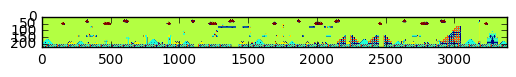

[['-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',
  '-',

In [34]:
parseLevel('mario-1-1.png')